In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('proctatinium_data.csv')
t_values = np.array(data["time"], dtype=float)
count_values = np.array(data["count_rate"], dtype=float)

In [2]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count Rate')

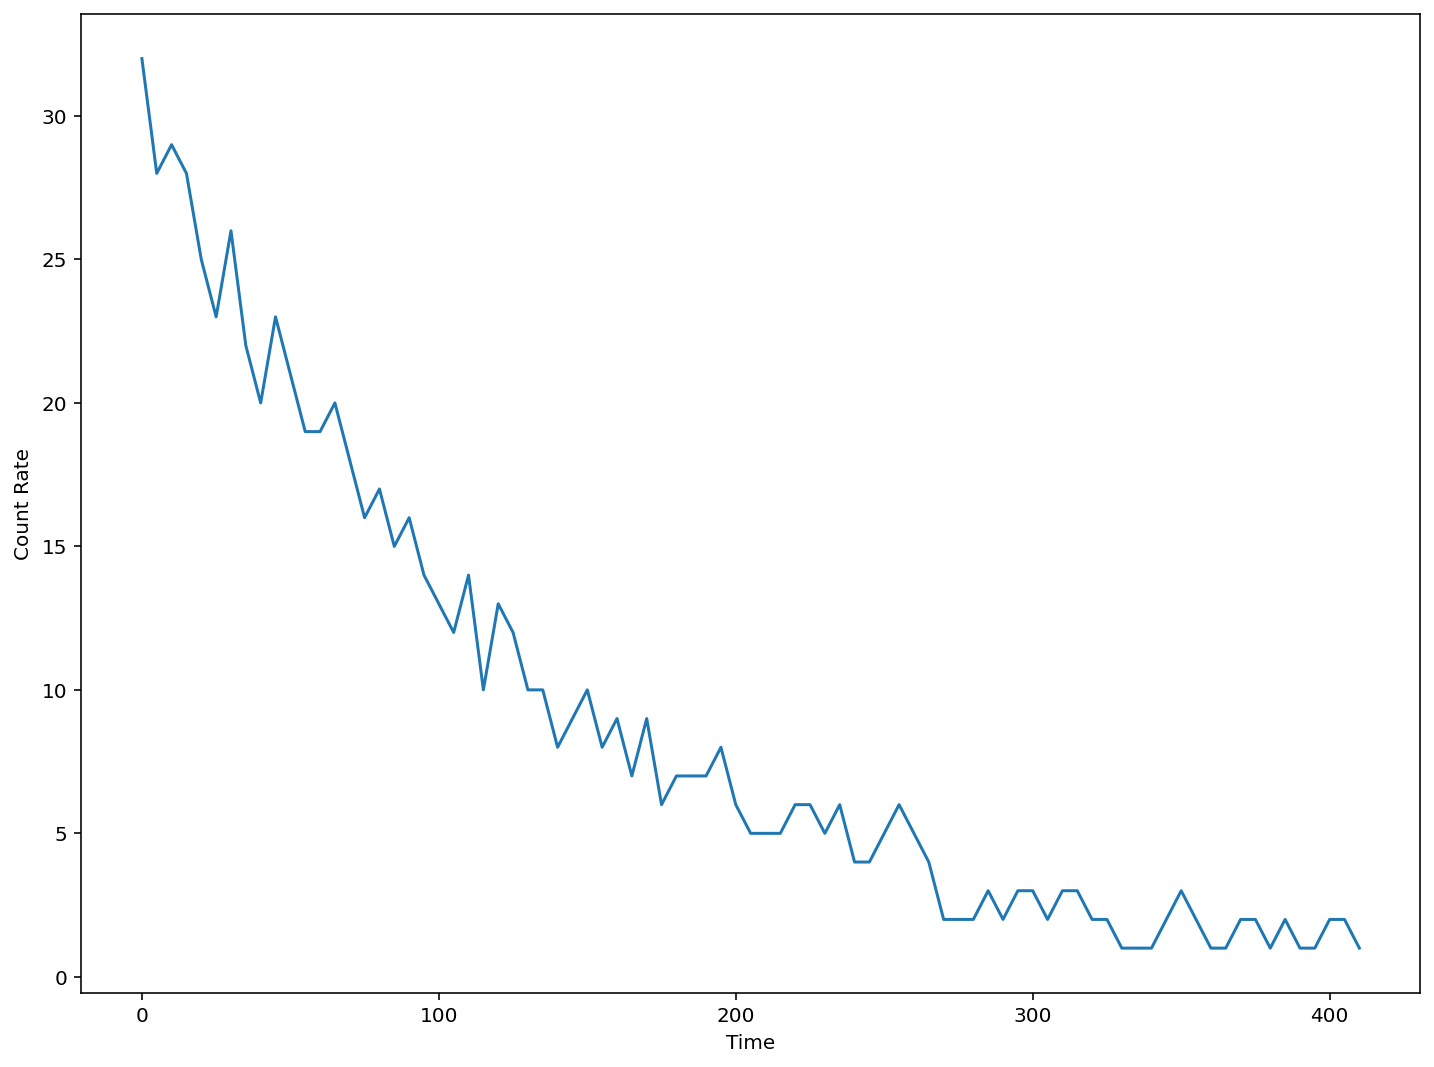

In [3]:
plt.figure(figsize=(12,9))
plt.plot(t_values, count_values)
plt.xlabel('Time')
plt.ylabel('Count Rate')

In [4]:
from scipy.optimize import curve_fit

In [5]:
def N(t, _lambda):
    return 32*np.exp(-_lambda*t)

In [6]:
#t_hl = ln2/_lambda

In [24]:
optimal_parameters = []

for i in range(10000):
    noisy_data = np.random.normal(0, 1, len(data)) + count_values
    optimal_parameters.append(curve_fit(N, t_values, np.random.normal(0, 1, len(data)) + count_values, 1)[0][0])
    

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app


(array([  50.70617651,  287.72807137, 1137.94093801, 2657.94701997,
        3450.37842965, 2595.44870939, 1234.6364374 ,  329.00054063,
          41.27246925,    7.07528044]),
 array([0.00806816, 0.00815296, 0.00823776, 0.00832256, 0.00840736,
        0.00849217, 0.00857697, 0.00866177, 0.00874657, 0.00883138,
        0.00891618]),
 <a list of 10 Patch objects>)

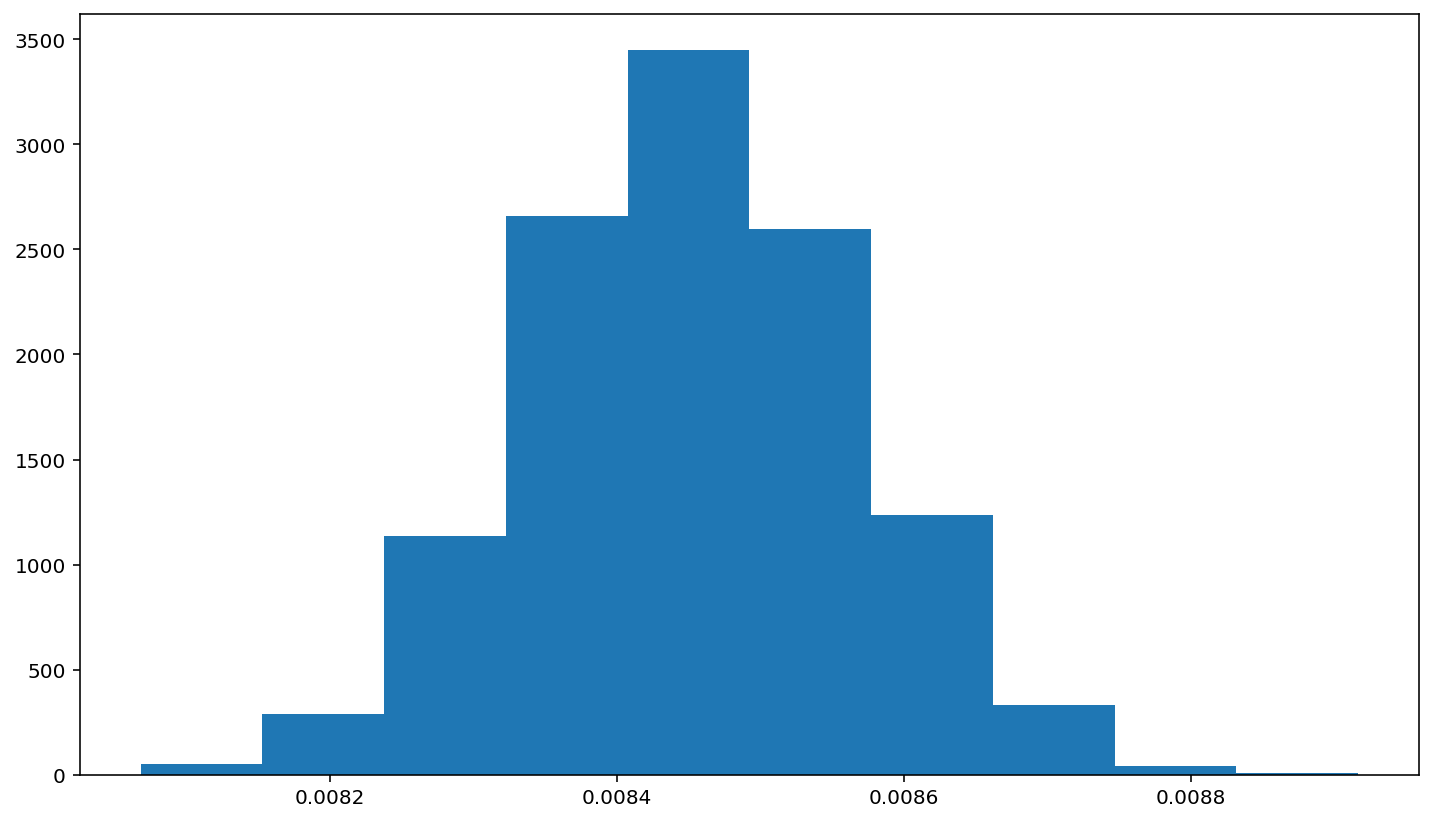

In [25]:
plt.hist(optimal_parameters, density=True)

In [27]:
mean_lambda = np.mean(optimal_parameters)
confidence_intervals = np.percentile(optimal_parameters, (2.5, 97.5))

In [28]:
print(mean_lambda)
print(confidence_intervals)

0.008451271606044223
[0.00823241 0.00867314]


In [30]:
half_life = np.log(2)/mean_lambda

In [36]:
print(half_life)
print('Error is', abs(77-(half_life)), 'seconds if .17 at the end of 1.17 means seconds') 
print('Error is', abs(60*1.17-(half_life)), 'seconds otherwise') 

82.01690974695651
Error is 5.0169097469565145 seconds if .17 at the end of 1.17 means seconds
Error is 11.816909746956526 seconds otherwise
